<center>
    <h1>✨ DECISION TREE ✨</h1>
</center>



<h2>I, Khái niệm</h2>
1, Tổng quan :

- Biểu diễn bằng cách sử dụng cây
- Mỗi cây quyết định được hiểu là một tập hợp các quy tắc IF - THEN (Nếu - Thì)
- Cây quyết đinh được ứng dụng nhiều các ứng dụng thực tế


2, Cách biểu diễn 1 cây :

- Mỗi nút bên trong đại diện cho một thuộc tính để kiểm tra dữ liệu đến.
- Mỗi nhánh/cây con của một nút tương ứng với một giá trị thuộc tính của nút đó.
- Mỗi nút lá đại diện cho một nhãn lớp.
- Khi một cây đã được học, chúng ta có thể dự đoán nhãn cho một phiên bản mới bằng cách sử dụng các thuộc tính của nó để di chuyển từ rễ xuống một chiếc lá.

ex : 

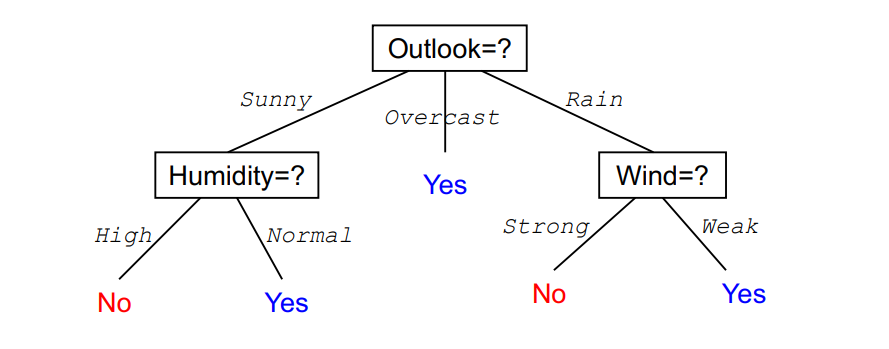

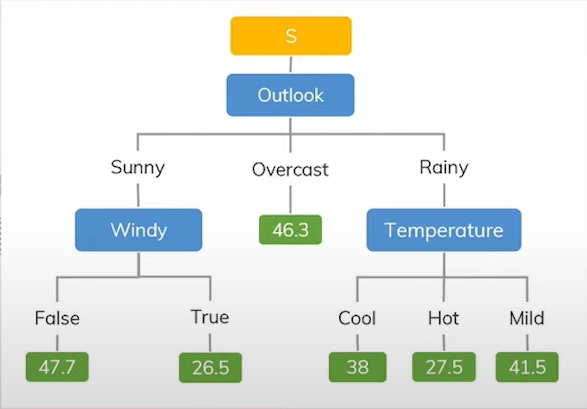

**Ví dụ :**

Người 1 = (Outlook=Overcast, Temperature=Hot, Humidity=High, Wind=Weakm)

Người 2 = (Outlook=Rain, Temperature=Mild, Humidity=High, Wind=Strong)

>**❗❗❗ Nhưng bây giờ mọi người có rất nhiều thuộc tính thì sắp xếp thứ tự các thuộc tính như thế nào ?**

**Xây dựng cây với ID3**
<br>
<br>
<br>
<center>
<h2>🤔 ID3 là gì ?</h2>
</center>

1, ID3 ?

- Là một trong những thuật toán quyết định đầu tiên trong lĩnh vực học máy 
- ID3 = (Iterative  Dichotomiser 3 : Phép nhân đôi lặp lại)
- Đặc điểm chính của nó là chọn thuộc tính tốt nhất để phân tách dữ liệu tại 1 bước dựa trên độ thuần khiết (information gain - IG)  



2, Dự đoán

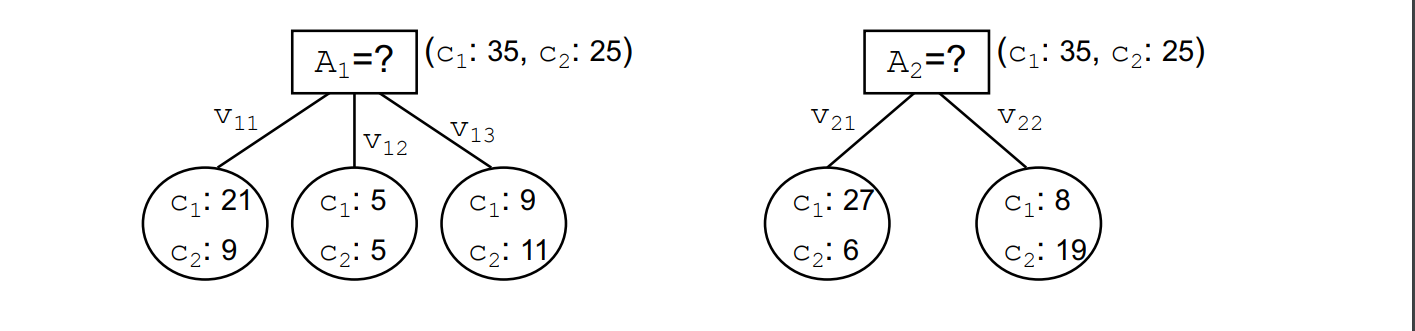

*Đề bài : Có 35 người thuộc c1, 25 người thuộc c2. Khi có thêm 1 người nữa vào thì chúng ta sẽ sử dụng 2 cây này để phán đoán xem người nào thuộc lớp nào* 

🚩 Cây nào sẽ phán đoán tốt hơn ??

Chúng ta sẽ tìm hiểu về Information Gain(IG) ?


**1, Entropy (Sự hỗn loạn)**

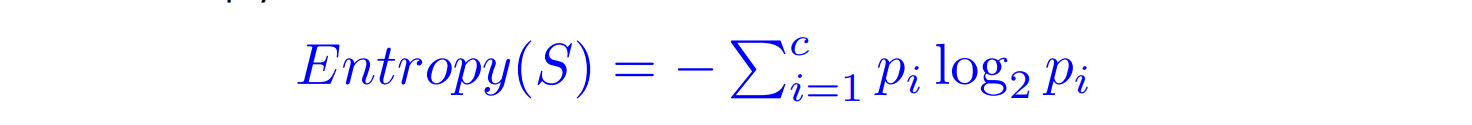

p : Tỉ lệ của các trường hợp
 
c : Số trường hợp



Ví dụ : Có 10 người, trong đó 7 người thuộc lớp A và 3 người thuộc lớp B


$Entropy = -\frac{7}{10} * log_2(\frac{7}{10}) + -\frac{3}{10} * log_2(\frac{3}{10}) \approx 0.88$

quy ước $ 0 * log_2(0) = 0$

Entropy = 0 khi nào ?

Entropy = 1 khi nào ?


C:\Users\toanx\AppData\Local\Temp\ipykernel_23824\1298688922.py:8: RuntimeWarning: divide by zero encountered in log2
  c = -a/10 * np.log2(a/10) - b/10 * np.log2(b/10)
C:\Users\toanx\AppData\Local\Temp\ipykernel_23824\1298688922.py:8: RuntimeWarning: invalid value encountered in multiply
  c = -a/10 * np.log2(a/10) - b/10 * np.log2(b/10)


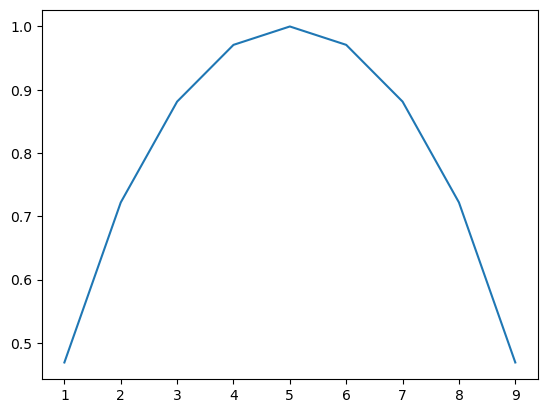

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import *

a = np.arange(0, 11)
b = 10 - a
c = -a/10 * np.log2(a/10) - b/10 * np.log2(b/10)

plt.plot(a, c)

Entropy cao hay thấp là tốt ?


Chúng ta hướng đến việc giảm entropy đi :

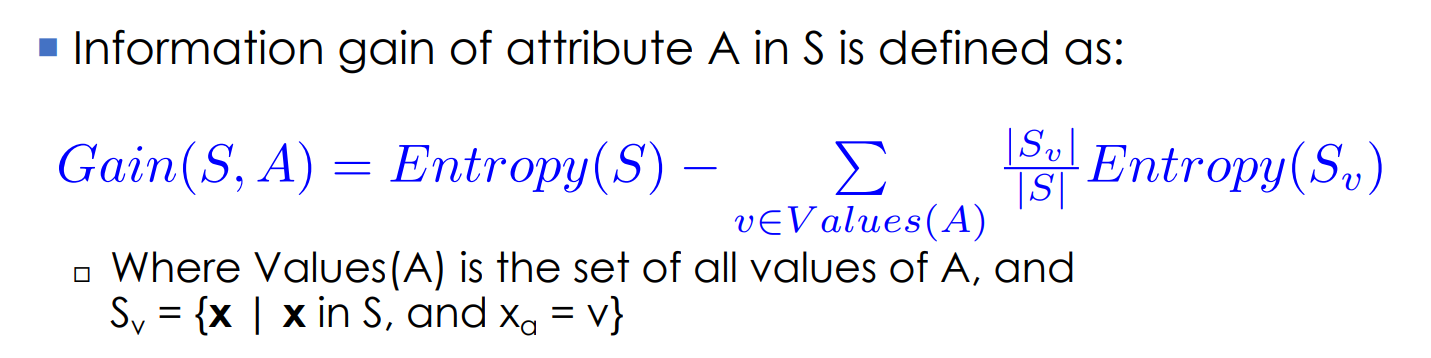

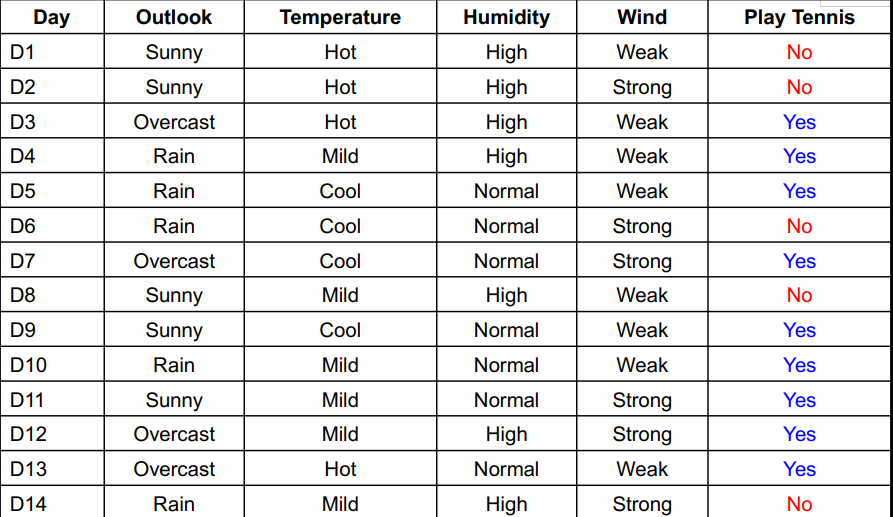

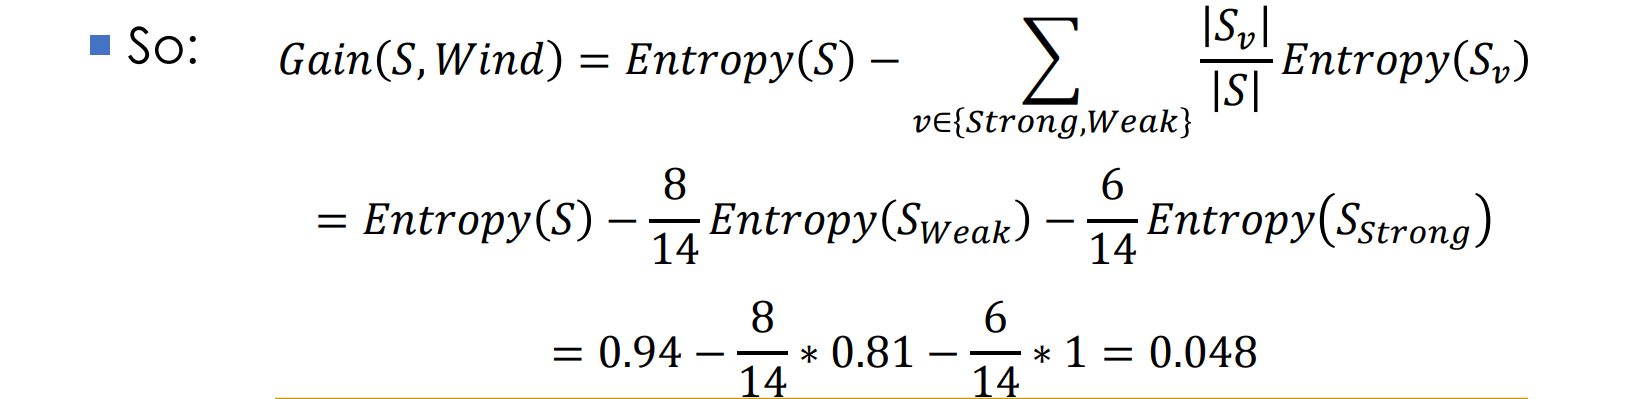

Entropy tại S tính bằng 2 giá trị là Yes và No, 5 No và 9 Yes ?


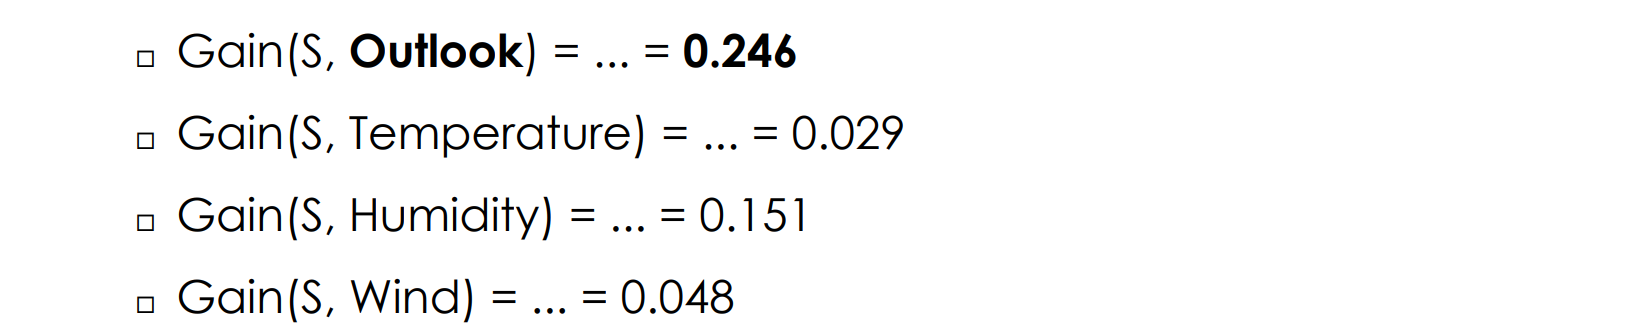

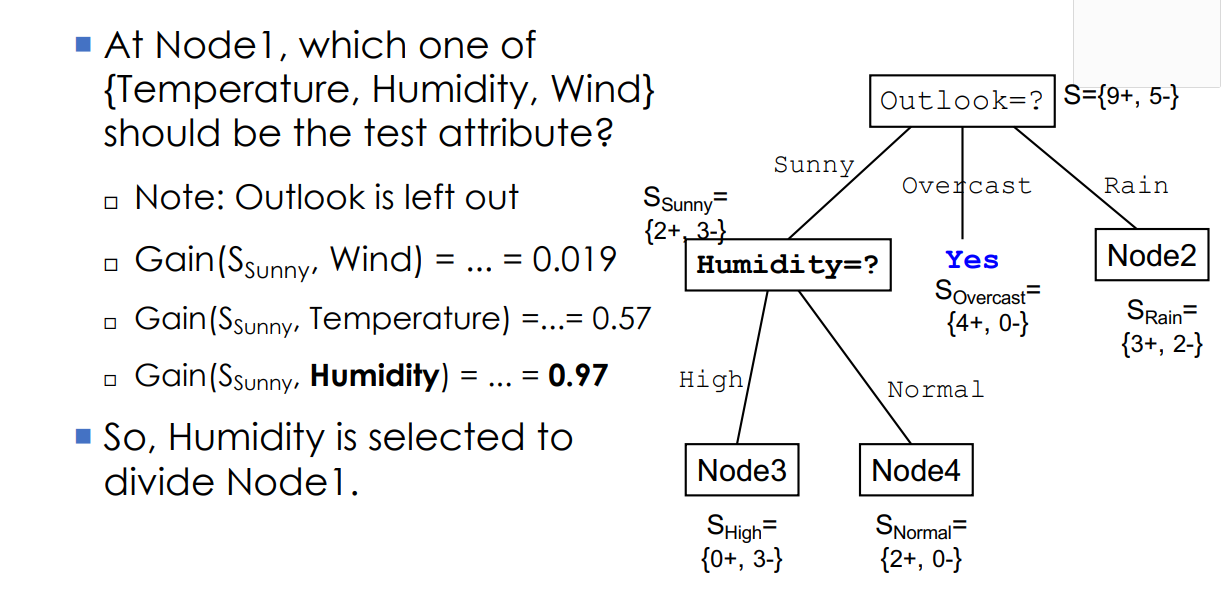

Dùng thuật toán này sẽ tạo ra shalow tree vì ?

- Tìm những phần tử có nhiều giá trị nên nó thường lùn

**Thuật toán tối ưu là vậy nhưng có rất nhiều những điểm chưa tốt**

**1, ID3 là 1 thuật toán tham lam nên nó không đảm bảo tằng cây sau khi trồng sẽ tối ưu toàn cục**

- Đổi sao cho ít tờ nhất
- Có vô hạn từ tiền nhưng không có tờ 5.000đ và 10.000đ nào
- Đổi 60.000 

**2, Dễ bị overfiting**

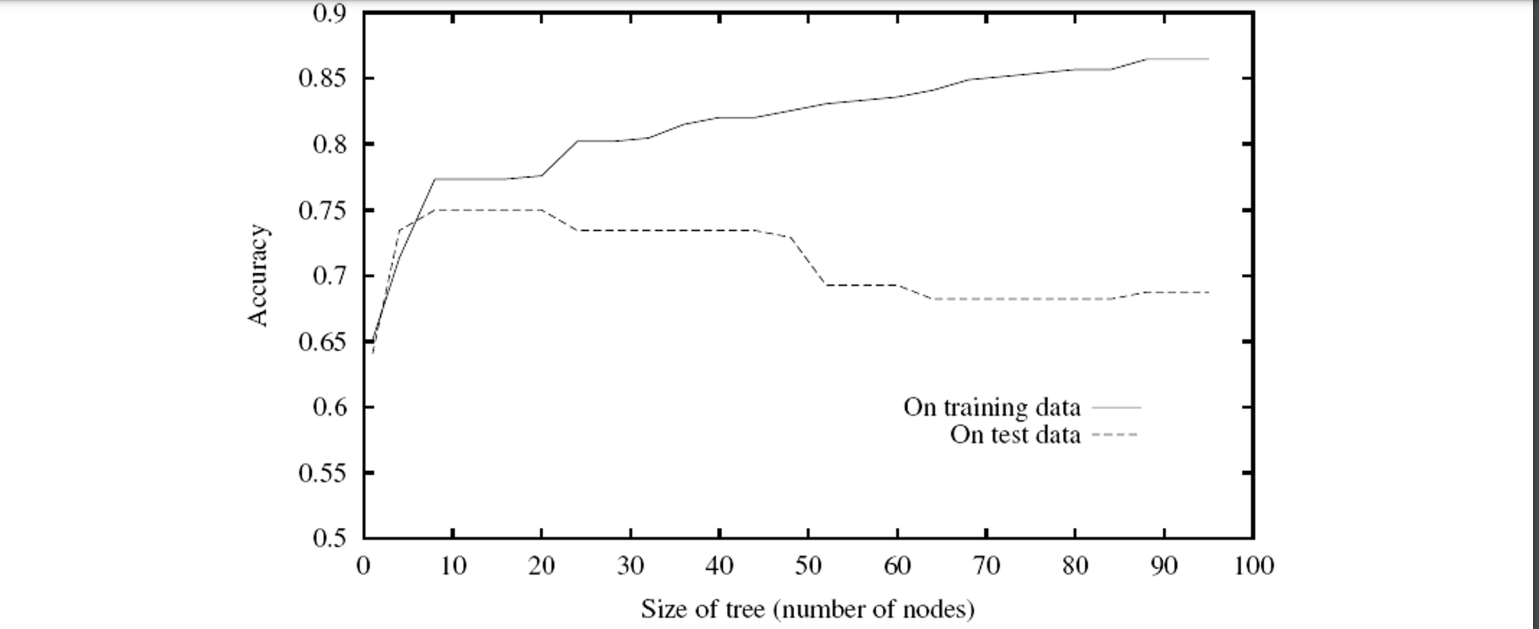

- Tiếp tục trồng cây sẽ cải thiện độ chính xác trên dữ liệu huấn luyện nhưng hoạt động kém trên dữ liệu thử nghiệm

- Do nó là thuật toán tham lam dữ liệu của nó sẽ bị phù hợp quá mức với train_input

**Solution**

- Dừng Học Sớm (Early Stopping):

>Dừng học sớm là một chiến lược để ngừng quá trình huấn luyện khi mô hình bắt đầu hiển thị dấu hiệu của overfitting. Thông thường, người ta theo dõi hiệu suất của mô hình trên một tập kiểm tra độc lập và ngừng huấn luyện khi hiệu suất trên tập kiểm tra không còn cải thiện hoặc thậm chí giảm xuống.

>Các tiêu chí dừng có thể bao gồm việc theo dõi độ chính xác, sự mất mát, hoặc các độ đo đánh giá khác trên tập kiểm tra. Khi hiệu suất không còn cải thiện, mô hình sẽ dừng học.

- Cắt Tỉa Cây (Pruning):

>Cắt tỉa cây là một quá trình sau quá trình huấn luyện, tại đó một số nhánh không quan trọng của cây được loại bỏ. Quá trình này giúp giảm độ sâu của cây và ngăn chặn quá mức fit dữ liệu huấn luyện.

>Cắt tỉa cây thường được thực hiện bằng cách loại bỏ các nhánh dựa trên một tiêu chí nào đó, chẳng hạn như sự giảm Information Gain khi nhánh đó được loại bỏ.

>Cắt tỉa có thể được thực hiện một cách trực tiếp, loại bỏ các nhánh không quan trọng ngay sau quá trình xây dựng cây, hoặc một cách gián tiếp bằng cách giữ một số nhánh thêm vào và sau đó loại bỏ những nhánh không quan trọng.

- Dùng Random Forest

**Cách 2 : Sử dụng GINI**

Công thức GINI :

$ S_(p_i) = 1 - [P_(yes)]^2 - [P_(no)]^2$ 

$ S = p_i * S_{p_i} + p_{i+1} * S_{p_{i+1}} + ..... + p_n * S_{p_{n}}$

$p_i : là tỉ lệ của các giá trị chia cho tổng giá trị$


$S_i : GINI$





In [3]:
import pandas as pd

df = pd.read_csv('data.csv')
df

Chest pain  Good blood circulation  Blocked arteries  Heart disease
0        yes                      no               yes             no
1        yes                     yes               yes            yes
2         no                      no               yes             no
3        yes                     yes                no            yes

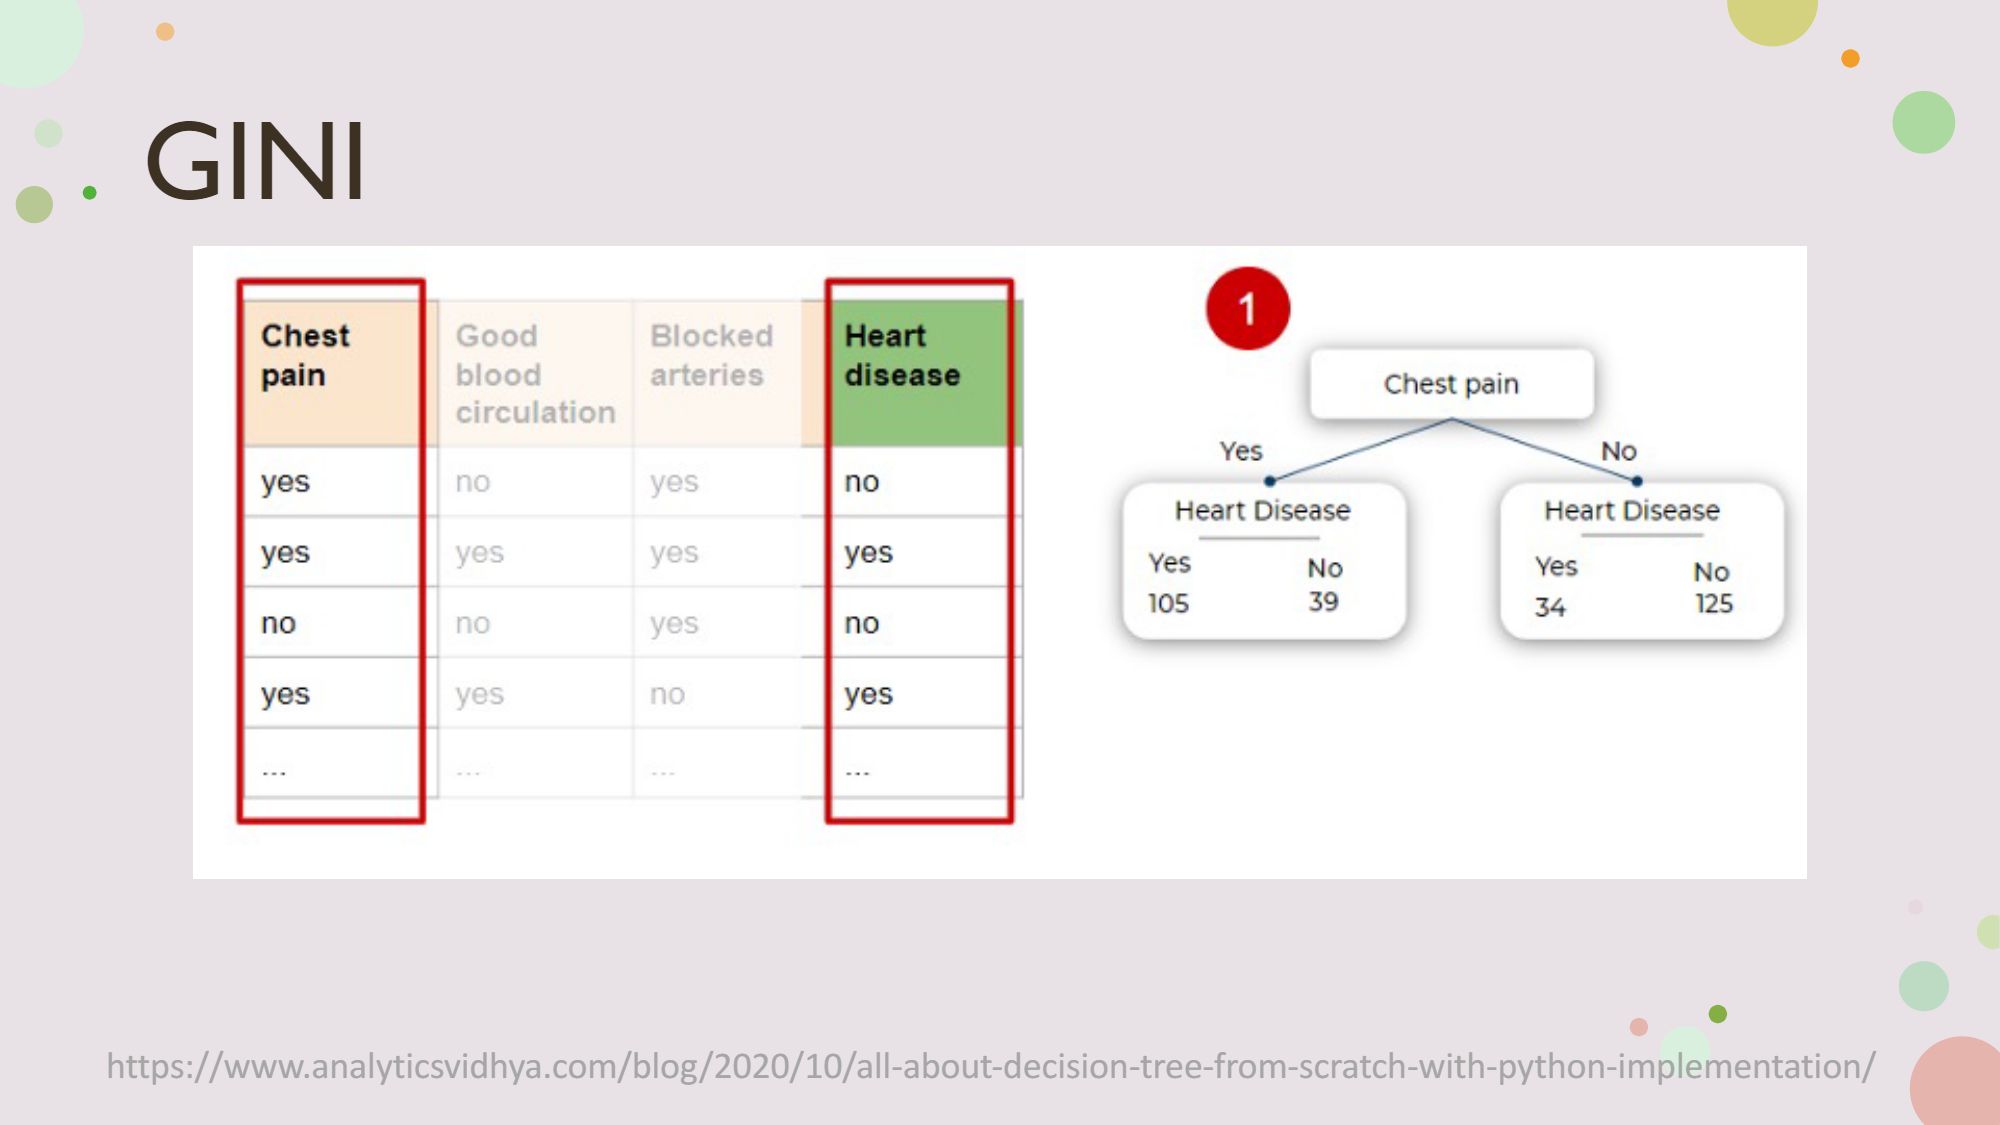

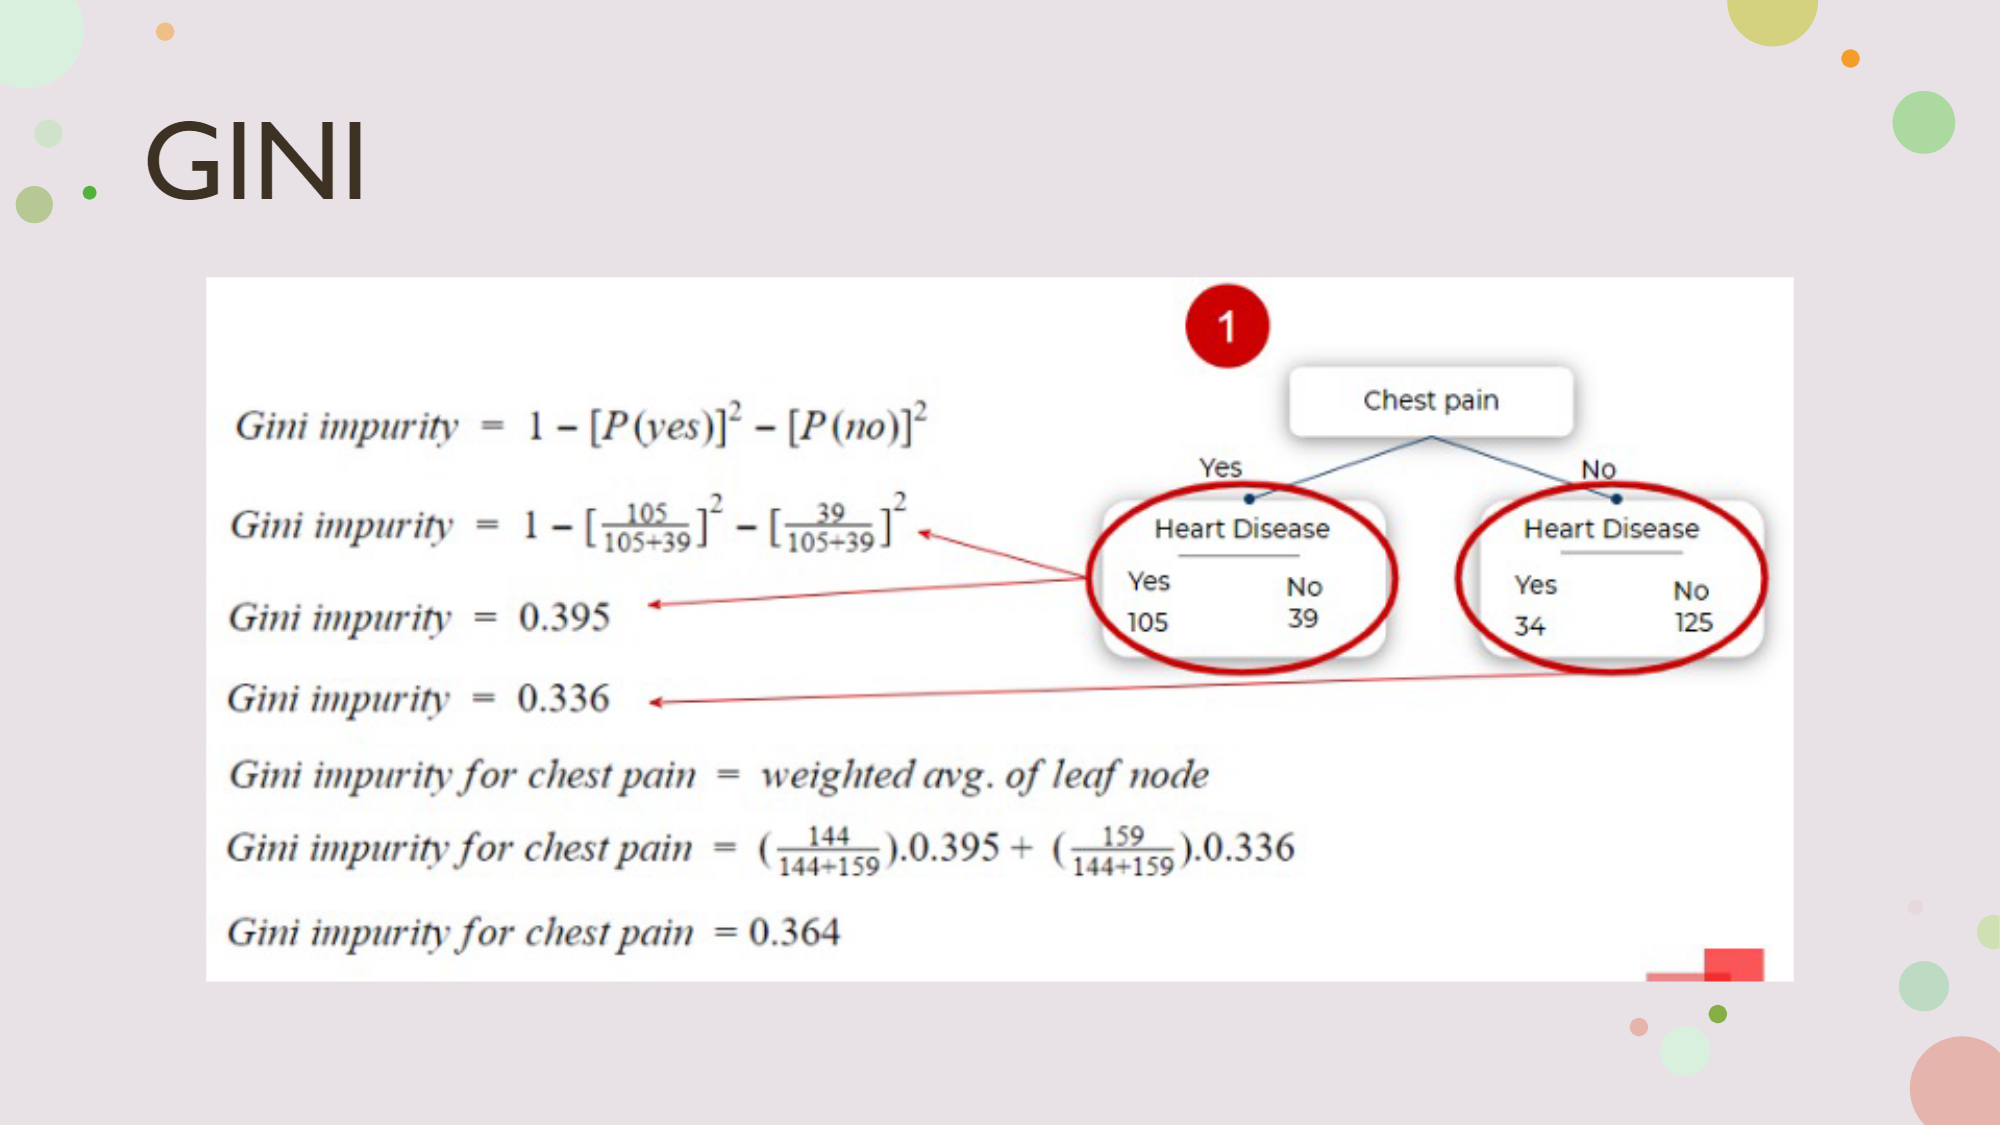

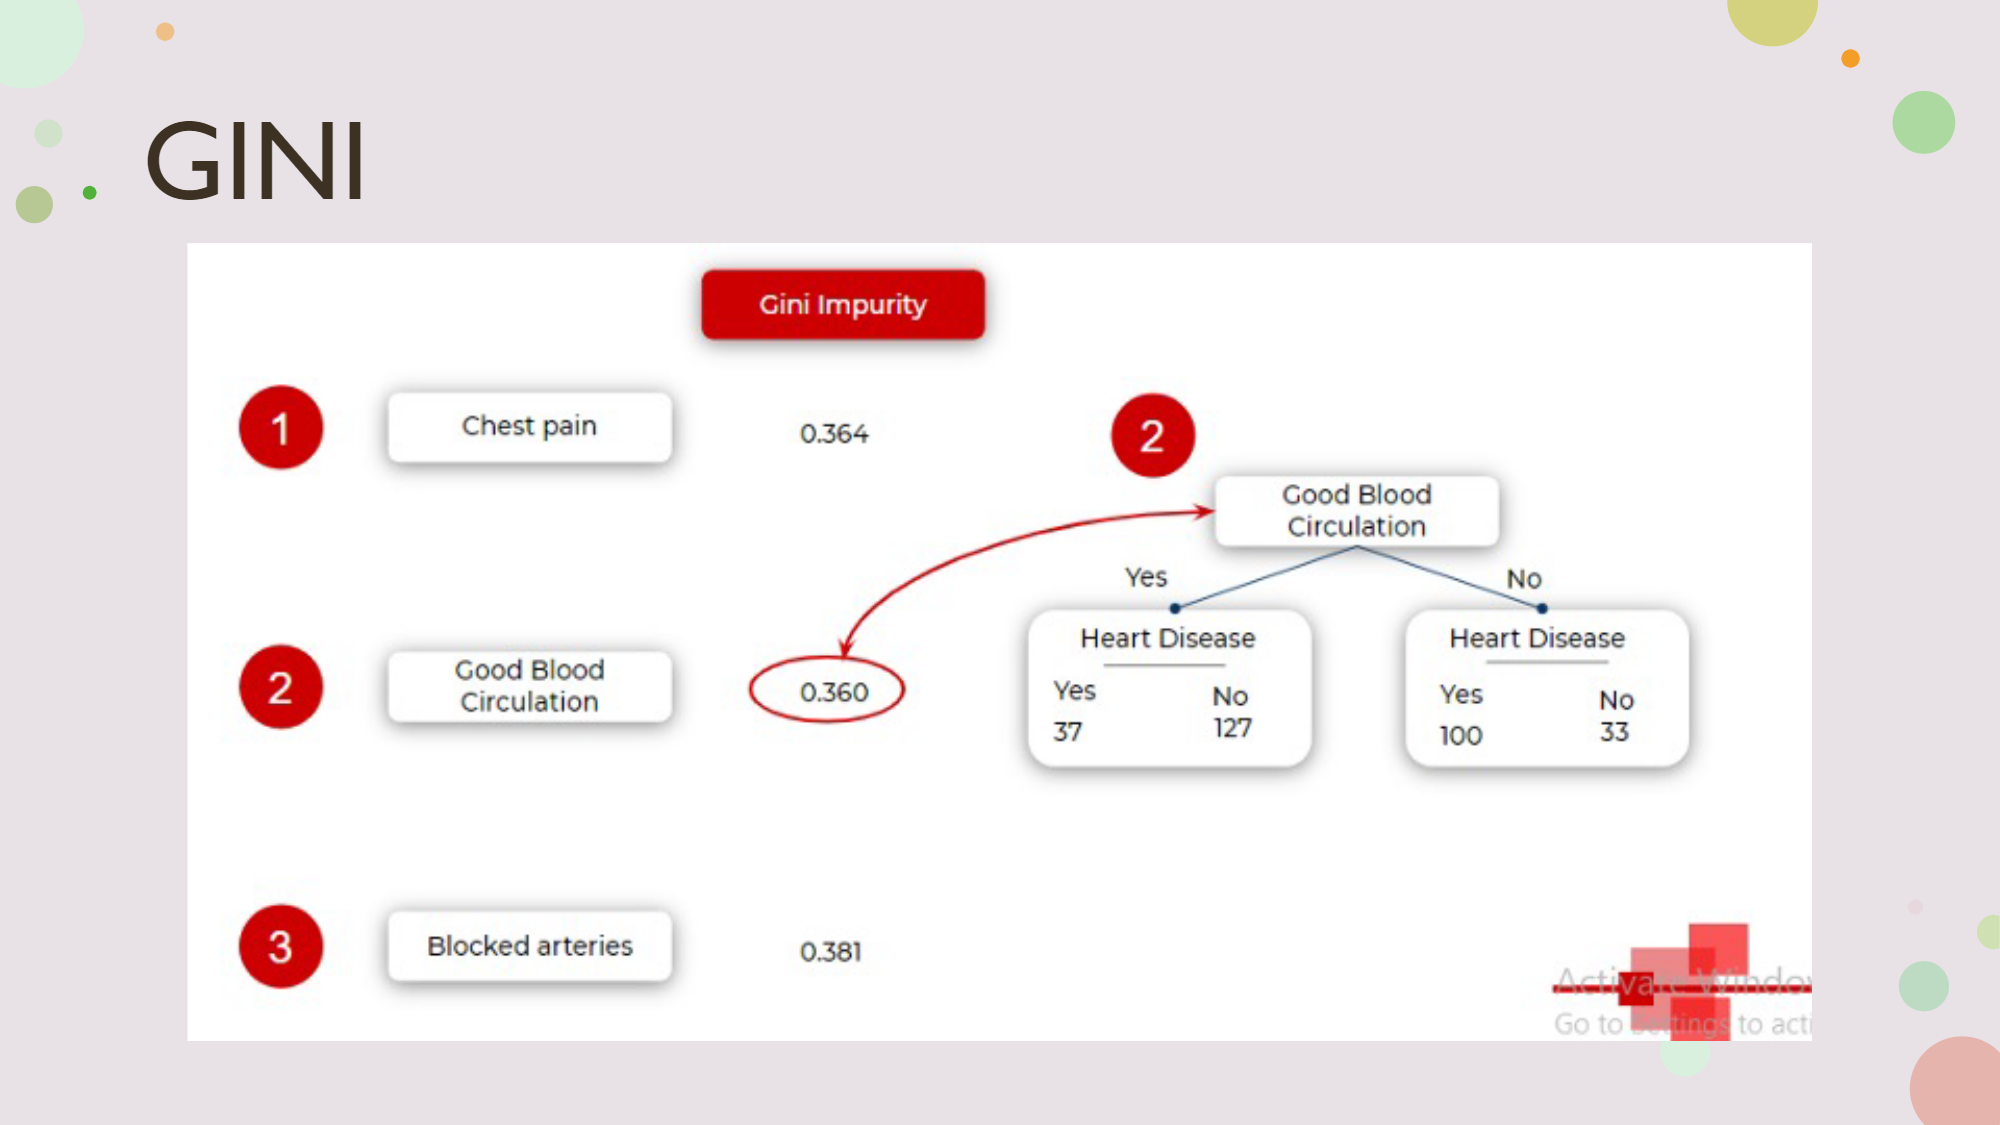

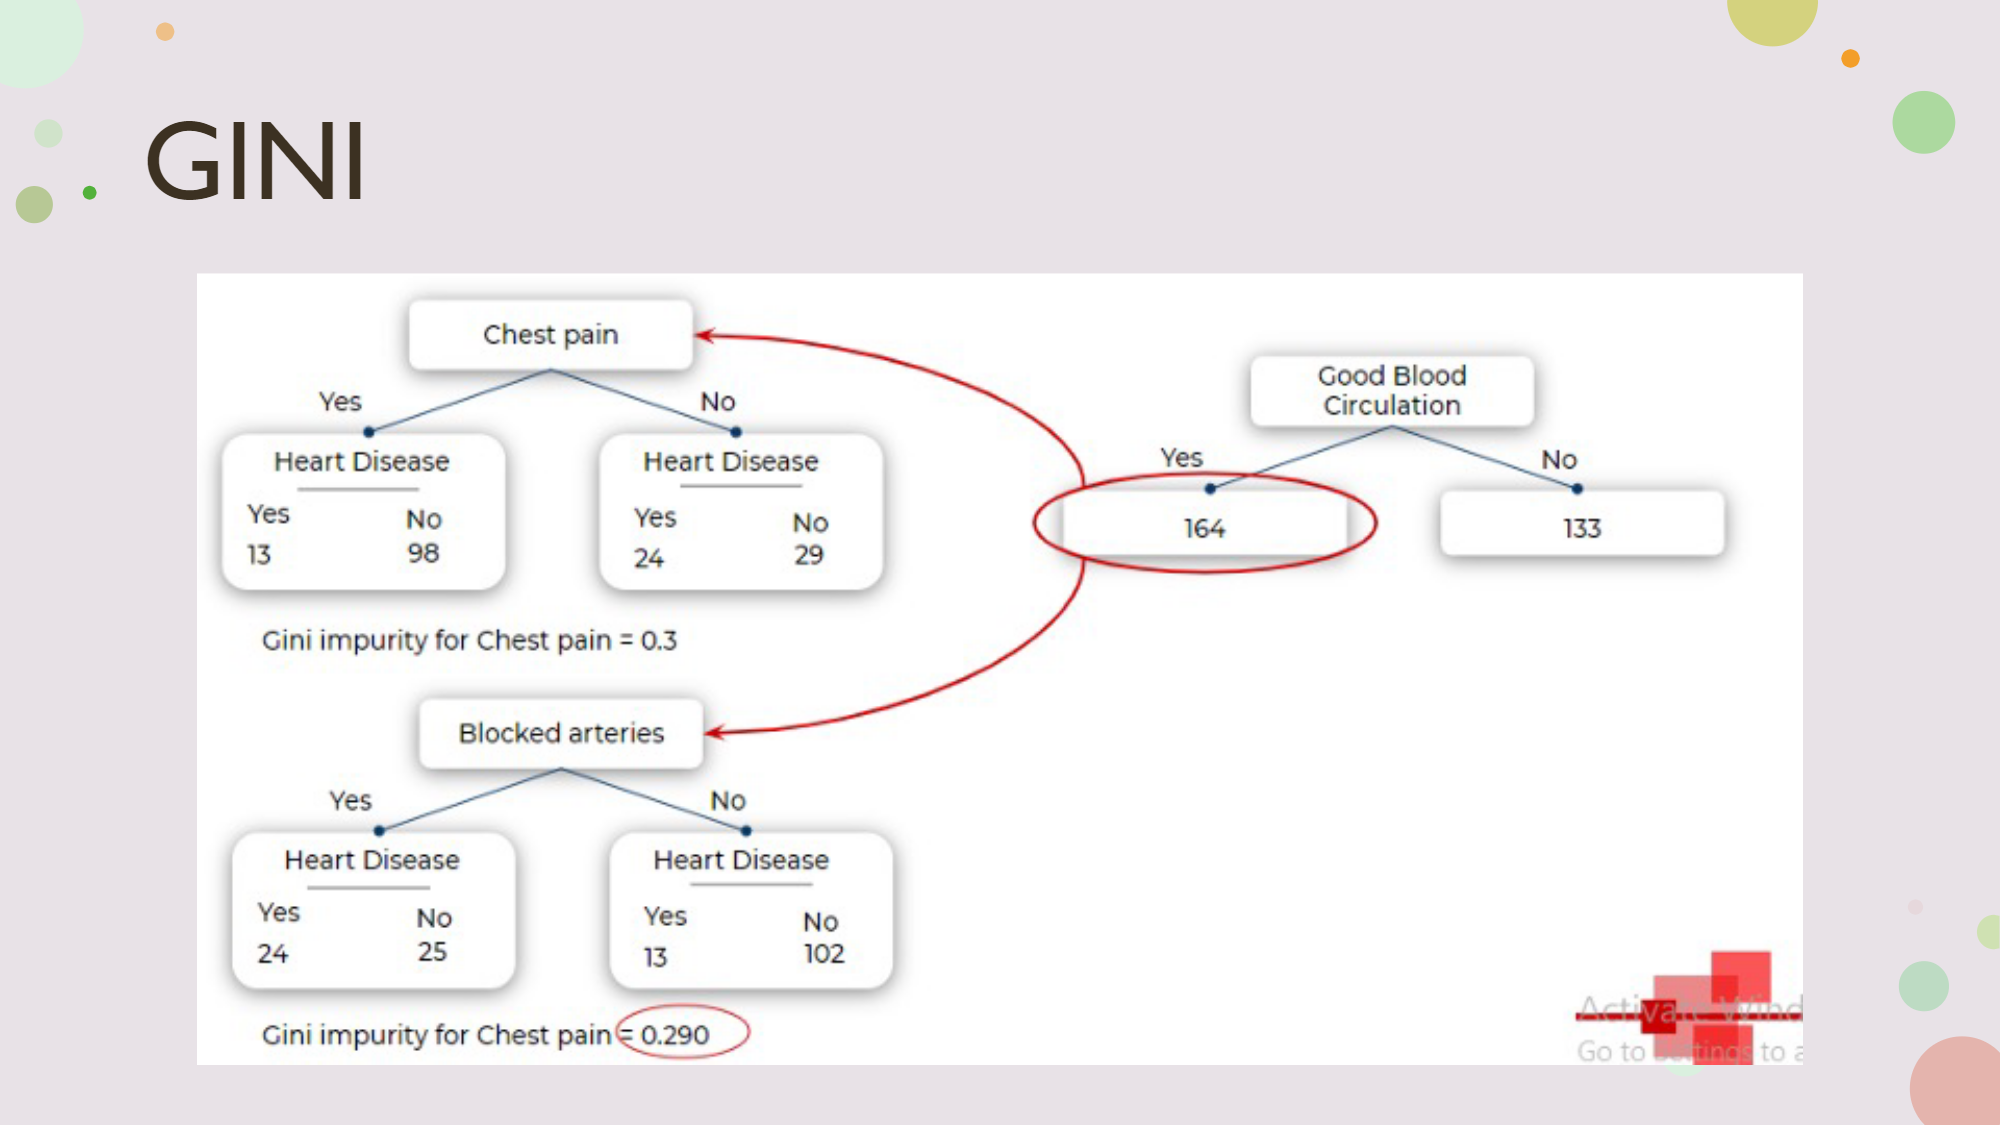

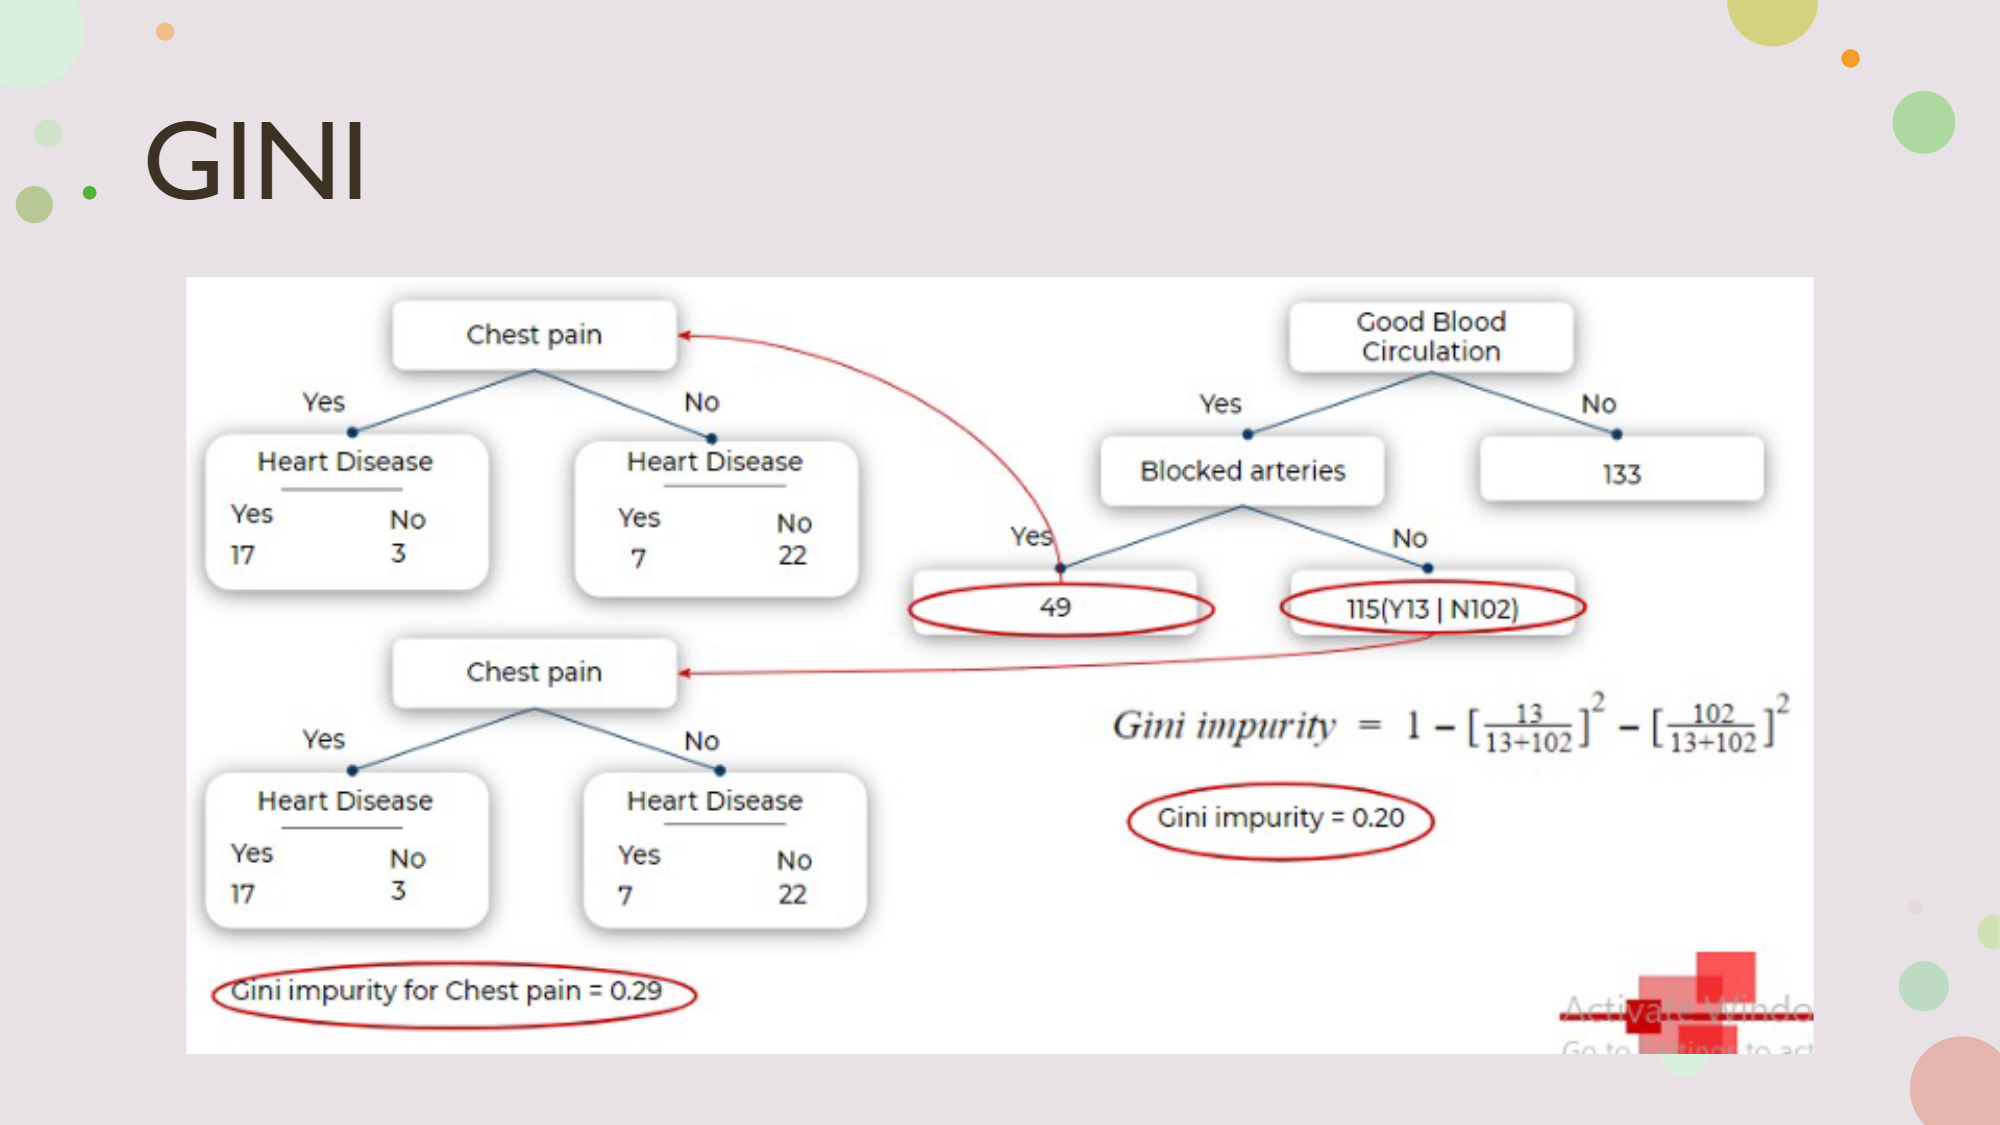



**Coding**

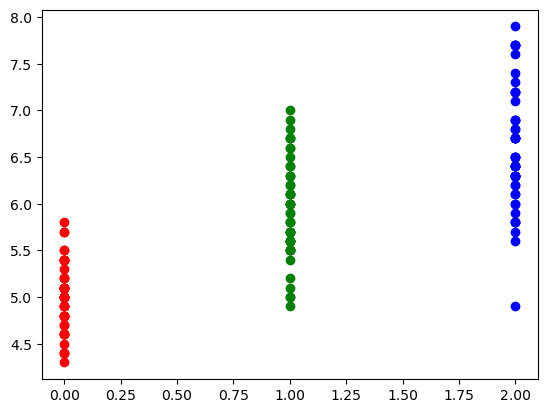

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv('data/IRIS.csv')

# Create lists to store sepal lengths for each species
setosa, versicolor, virginica = [], [], []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    if row['species'] == 'Iris-setosa':
        setosa.append(row['sepal_length'])
    elif row['species'] == 'Iris-versicolor':
        versicolor.append(row['sepal_length'])
    else:
        virginica.append(row['sepal_length'])

# Plot the sepal lengths for each species
plt.scatter([0] * len(setosa),setosa, label='Setosa', color='red')
plt.scatter( [1] * len(versicolor), versicolor, label='Versicolor', color='green')
plt.scatter([2] * len(virginica), virginica, label='Virginica', color='blue')




In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Đọc dữ liệu từ tập tin CSV hoặc bất kỳ nguồn dữ liệu nào khác
# Đảm bảo dữ liệu của bạn có cột đầu ra (target) và các cột đầu vào (features).
# Dưới đây là một ví dụ sử dụng pandas DataFrame và Iris dataset.
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Tạo mô hình cây quyết định
model = DecisionTreeClassifier(criterion='entropy') # có thể chọn 'entropy' nếu muốn sử dụng Entropy

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


<center>

<h2>✨Random Forest✨</h2>

</center>

>Được phát triển năm 2001 có thể dùng cho cả Classification và regression, ....

**Ý tưởng chính :**
> *Dự đoán dựa trên sự kết hợp của nhiều cây quyết định, bằng cách lấy trung bình của tất cả các cá nhân phỏng đoán.*

> *Hiện nay là một trong những phương pháp phổ biến và chính xác nhất* 

> *Nó cũng rất chung chung.*

> *RF có thể được thực hiện dễ dàng và hiệu quả.*

> *Nó có thể giải quyết các vấn đề có kích thước rất cao mà không cần trang bị quá mức, tuy nhiên, rất ít thông tin về tính chất lý thuyết của nó*

🤔 Thuật toán này như thế nào :

B1 : Ngẫu nhiên hóa và không cắt tỉa

> - Với mỗi cây và tại mỗi nút, ta chọn ngẫu nhiên một tập con của các thuộc tính.
> - Tìm cách phân chia tốt nhất và sau đó phát triển các cây con thích hợp.
> - Mỗi cây sẽ được phát triển đến kích thước lớn nhất mà không cần cắt tỉa.

B2 : Kết hợp

> - Mỗi dự đoán sau đó được thực hiện bằng cách lấy trung bình của tất cả các dự đoán của từng cây riêng lẻ.

B3 : Đóng gói 

> - Tập huấn luyện cho mỗi cây được tạo ra bởi lấy mẫu (có thay thế) từ dữ liệu gốc.

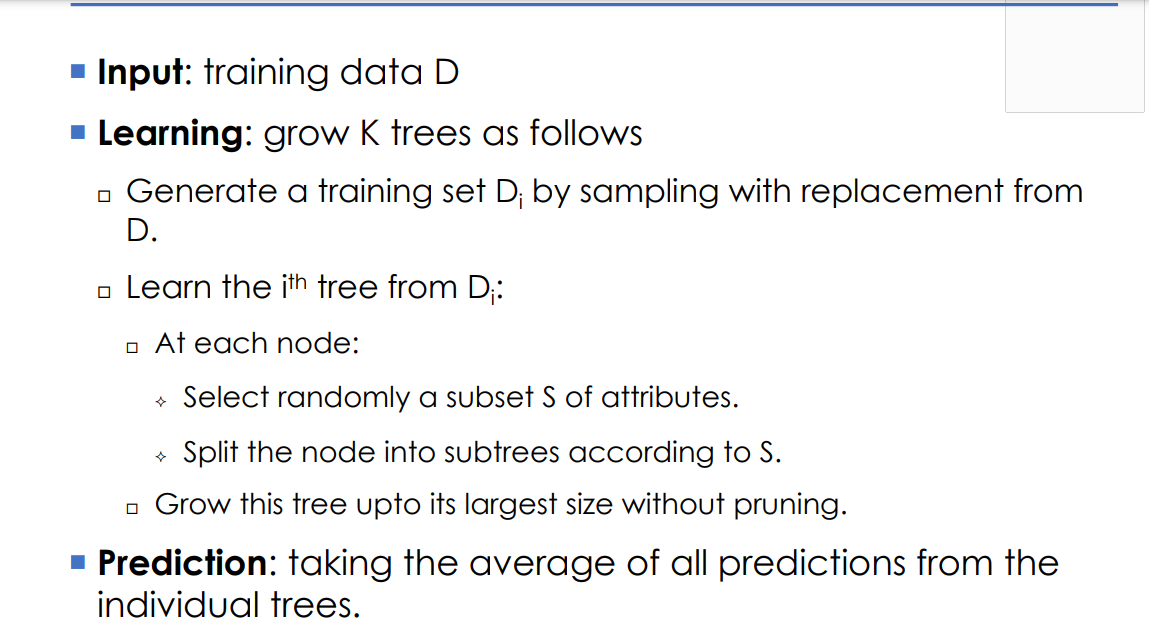

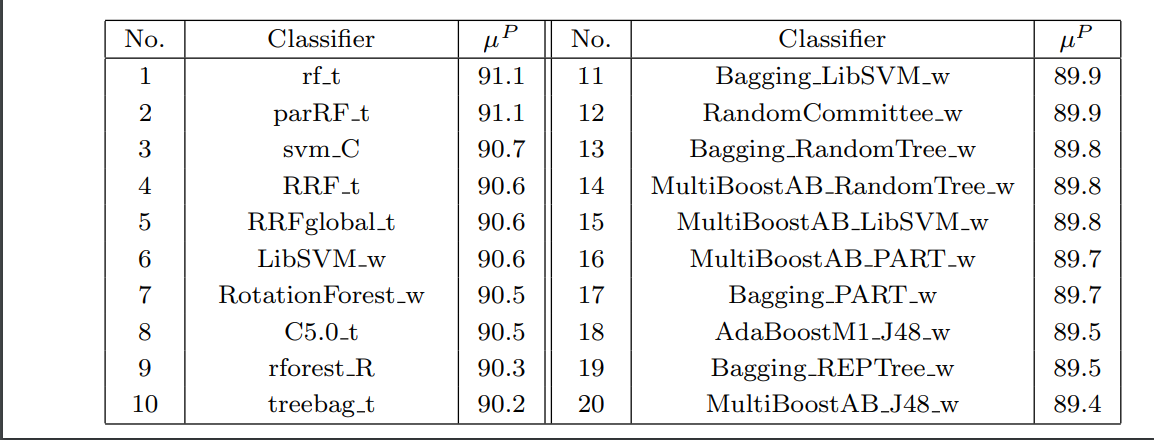

**Coding :**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# In báo cáo phân loại
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

